In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
x, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [5]:
x.shape

(50, 2)

In [8]:
y[40]

-1

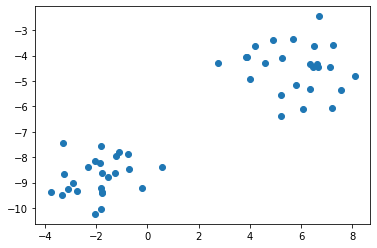

In [19]:
plt.scatter(x[:,0],x[:,1])

In [20]:
################ Support Vector Machine ##################

class SVM:
    def __init__(self,lr=.001,lm=.01,itr= 1000):
        self.lr = lr
        self.lm = lm
        self.itr = itr
        self.w = None
        self.b = None
        
    def fit(self,x,y):
        y = np.where(y <= 0, -1, 1)
        self.w = np.zeros(x.shape[1])
        self.b = 0
        
        for i in range(self.itr):
            for inx, itm in enumerate(x):
                condition = y[inx]*(np.dot(itm,self.w)-self.b)>=1
                
                if condition:
                    self.w -= self.lr*(2*self.lm*self.w)
                else:
                    self.w -= self.lr*(2*self.lm*self.w - np.dot(y[inx],itm))
                    self.b -= self.lr*y[inx];
    def predict(self,x):
        yp = np.dot(x,self.w)-self.b
        return np.sign(yp)

In [22]:
clf = SVM()
clf.fit(x, y)

In [23]:
print(clf.w, clf.b)

[0.58977016 0.17946483] -0.1520000000000001


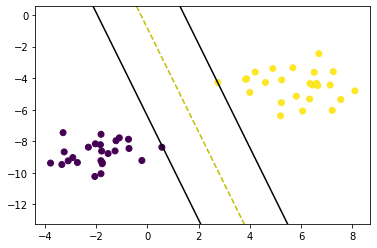

In [26]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(x[:, 0], x[:, 1], marker="o", c=y)

    x0_1 = np.amin(x[:, 0])
    x0_2 = np.amax(x[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(x[:, 1])
    x1_max = np.amax(x[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()